# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import *
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import *
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.feature_selection import *
from tabulate import tabulate
import glob
import os
from sklearn.svm import SVC

# Importing rpy2 and dependencies

In [2]:
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

Unable to determine R home: [WinError 2] The system cannot find the file specified


In [3]:
print(rpy2.__version__)

3.5.6


In [4]:
# import rpy2's package module
import rpy2.robjects.packages as rpackages

# import R's utility package
utils = rpackages.importr('utils')

# select a mirror for R packages
utils.chooseCRANmirror(ind=1) # select the first mirror in the list

<rpy2.rinterface_lib.sexp.NULLType object at 0x000001994ABB7900> [RTYPES.NILSXP]

# Installing R packages

In [5]:
# R package names
packnames = ("zCompositions", "robCompositions")

# R vector of strings
from rpy2.robjects.vectors import StrVector

# Selectively install what needs to be install.
# We are fancy, just because we can.
names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))

In [6]:
zCompositions = importr('zCompositions')
robCompositions = importr("robCompositions")

# Import data

In [7]:
path = 'CRC/'
df = pd.read_csv(path + "/all_data.csv")
#df = pd.read_csv(path + "P003.MArumugam.Data.AT-CRC_species.csv")

In [8]:
# df = df.reset_index()
# df = df.set_index("index")

In [9]:
lbl=LabelEncoder()
df['condition'] = lbl.fit_transform(df['condition'])

In [10]:
groups = df["Country"].to_numpy()
X = df.drop(["condition","Unnamed: 0", "Country"], axis=1)
#X = df.drop(["condition"], axis=1)
y = df["condition"].to_numpy()

In [11]:
X

,Streptococcus_anginosus___ref_mOTU_v2_0004__,Enterobacteriaceae_sp.___ref_mOTU_v2_0036__,Citrobacter_sp.___ref_mOTU_v2_0076__,Klebsiella_michiganensis/oxytoca___ref_mOTU_v2_0079__,Enterococcus_faecalis___ref_mOTU_v2_0116__,Lactobacillus_salivarius___ref_mOTU_v2_0125__,Dielma_fastidiosa___ref_mOTU_v2_0138__,Streptococcus_constellatus/intermedius___ref_mOTU_v2_0143__,Streptococcus_parasanguinis___ref_mOTU_v2_0144__,Streptococcus_sp._HSISM1___ref_mOTU_v2_0145__,...,unknown_Porphyromonas___meta_mOTU_v2_7777__,unknown_Clostridiales___meta_mOTU_v2_7778__,unknown_Clostridiales___meta_mOTU_v2_7781__,unknown_Clostridiales___meta_mOTU_v2_7782__,unknown_Clostridiales___meta_mOTU_v2_7784__,Clostridium_sp._CAG__230___meta_mOTU_v2_7788__,Clostridium_sp._CAG__1193___meta_mOTU_v2_7789__,unknown_Erysipelotrichaceae___meta_mOTU_v2_7790__,unknown_Clostridiales___meta_mOTU_v2_7795__,unknown_Clostridiales___meta_mOTU_v2_7800__
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000083,0.000000,0.000249,0.000249,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000083,0.000083
1,0.000591,0.000066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000066,0.002102,0.000197,...,0.000000,0.000000,0.000000,0.000788,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2,0.000840,0.000065,0.002454,0.000000,0.000065,0.013111,0.000000,0.000065,0.012013,0.002777,...,0.000000,0.000000,0.000194,0.000065,0.000000,0.000840,0.0,0.0,0.001808,0.000000
3,0.000000,0.000071,0.000000,0.000000,0.000000,0.000000,0.000213,0.000071,0.000142,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,0.000086,0.019236,0.001111,0.000256,0.000086,0.000086,0.000000,0.000000,0.000513,0.000000,...,0.000000,0.000171,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.000000,0.000118,0.000000,0.000000,0.000059,0.000000,0.000118,0.000000,0.000059,0.000000,...,0.002590,0.000000,0.000000,0.001118,0.000000,0.000000,0.0,0.0,0.000000,0.000000
764,0.000038,0.000038,0.000000,0.000000,0.000000,0.000000,0.000075,0.000038,0.000113,0.000113,...,0.000151,0.000000,0.000000,0.000151,0.000038,0.000000,0.0,0.0,0.000000,0.000000
765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000348,0.000044,0.001741,0.000000,0.000435,0.0,0.0,0.000000,0.000044
766,0.000000,0.000312,0.000000,0.000000,0.000208,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000208,0.000000,0.0,0.0,0.000000,0.000156


# Pandas dataframe to R table

In [12]:
with localconverter(robjects.default_converter + pandas2ri.converter):
    r_from_pd_df = robjects.conversion.py2rpy(X)

In [13]:
np.random.seed(333)
R_X = zCompositions.cmultRepl(r_from_pd_df, label = 0)

No. adjusted imputations:  425572 


In [14]:
np.random.seed(333)
R_clr_X = robCompositions.cenLR(R_X)

In [15]:
type(R_clr_X[0])

rpy2.robjects.vectors.DataFrame

# R table to Pandas dataframe

In [16]:
with localconverter(robjects.default_converter + pandas2ri.converter):
    X = robjects.conversion.rpy2py(R_clr_X[0])

In [17]:
X

,Streptococcus_anginosus___ref_mOTU_v2_0004__,Enterobacteriaceae_sp.___ref_mOTU_v2_0036__,Citrobacter_sp.___ref_mOTU_v2_0076__,Klebsiella_michiganensis/oxytoca___ref_mOTU_v2_0079__,Enterococcus_faecalis___ref_mOTU_v2_0116__,Lactobacillus_salivarius___ref_mOTU_v2_0125__,Dielma_fastidiosa___ref_mOTU_v2_0138__,Streptococcus_constellatus/intermedius___ref_mOTU_v2_0143__,Streptococcus_parasanguinis___ref_mOTU_v2_0144__,Streptococcus_sp._HSISM1___ref_mOTU_v2_0145__,...,unknown_Porphyromonas___meta_mOTU_v2_7777__,unknown_Clostridiales___meta_mOTU_v2_7778__,unknown_Clostridiales___meta_mOTU_v2_7781__,unknown_Clostridiales___meta_mOTU_v2_7782__,unknown_Clostridiales___meta_mOTU_v2_7784__,Clostridium_sp._CAG__230___meta_mOTU_v2_7788__,Clostridium_sp._CAG__1193___meta_mOTU_v2_7789__,unknown_Erysipelotrichaceae___meta_mOTU_v2_7790__,unknown_Clostridiales___meta_mOTU_v2_7795__,unknown_Clostridiales___meta_mOTU_v2_7800__
0,-0.639814,-1.123042,-0.638052,-0.627669,-0.766950,-0.451501,0.657708,-0.866839,1.756421,1.756421,...,-0.572469,-0.712546,-0.536782,-0.724254,-0.560843,-0.535670,-0.353747,-0.392983,0.657708,0.657708
1,2.453491,0.256614,-0.833799,-0.823416,-0.962697,-0.647248,-0.873193,0.256614,3.722002,1.354877,...,-0.768216,-0.908293,-0.732529,2.741174,-0.756590,-0.731417,-0.549494,-0.588730,-0.970122,-0.962697
2,2.598610,0.033862,3.671247,-1.061800,0.033862,5.346866,-1.111577,0.033862,5.259407,3.794861,...,-1.006600,-1.146677,1.132273,0.033862,-0.994974,2.598610,-0.787878,-0.827114,3.365865,-1.201081
3,-0.596255,0.544960,-0.594493,-0.584110,-0.723391,-0.407942,1.643102,0.544960,1.237634,-0.723391,...,-0.528910,-0.668988,-0.493223,-0.680695,-0.517284,-0.492111,-0.310188,-0.349424,-0.730816,-0.723391
4,0.157178,5.573185,2.722033,1.255696,0.157178,0.157178,-1.229870,-1.419263,1.948844,-1.319373,...,-1.124892,0.850231,-1.089205,-1.276677,-1.113267,-1.088093,-0.906170,-0.945406,-1.326798,-1.319373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,-0.996471,0.650929,-0.994709,-0.984326,-0.041564,-0.808158,0.650929,-1.223496,-0.041564,-1.123607,...,3.741974,-1.069203,-0.893439,2.902223,-0.917500,-0.892327,-0.710404,-0.749640,-1.131032,-1.123607
764,-0.490840,-0.490840,-1.000097,-0.989714,-1.128995,-0.813546,0.203636,-0.490840,0.608517,0.608517,...,0.896199,-1.074592,-0.898827,0.896199,-0.490840,-0.897715,-0.715792,-0.755028,-1.136420,-1.128995
765,-0.996933,-1.480161,-0.995171,-0.984788,-1.124069,-0.808619,-1.034565,-1.223958,-1.404673,-1.124069,...,-0.929588,1.756708,-0.323276,3.366147,-0.917962,1.979854,-0.710866,-0.750102,-1.131494,-0.323276
766,-0.751492,1.998640,-0.749730,-0.739347,1.593176,-0.563179,-0.789125,-0.978518,-1.159233,-0.878628,...,-0.684147,-0.824225,-0.648460,-0.835932,1.593176,-0.647348,-0.465425,-0.504661,-0.886053,1.305489


In [18]:
XT = X.T
XT

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
Streptococcus_anginosus___ref_mOTU_v2_0004__,-0.639814,2.453491,2.598610,-0.596255,0.157178,0.510385,1.332754,-1.175181,-0.783341,-1.157931,...,-1.189774,-1.373054,-1.359970,-1.188060,1.345367,-0.996471,-0.490840,-0.996933,-0.751492,-0.619330
Enterobacteriaceae_sp.___ref_mOTU_v2_0036__,-1.123042,0.256614,0.033862,0.544960,5.573185,7.364506,4.062783,0.035616,0.380089,5.863864,...,2.013689,3.671123,1.055905,-1.671288,0.651934,0.650929,-0.490840,-1.480161,1.998640,-1.102559
Citrobacter_sp.___ref_mOTU_v2_0076__,-0.638052,-0.833799,3.671247,-0.594493,2.722033,-0.814918,0.927289,-1.173420,-0.781579,-1.156169,...,-1.188012,-1.371292,-1.358209,-1.186298,-0.635869,-0.994709,-1.000097,-0.995171,-0.749730,2.941765
Klebsiella_michiganensis/oxytoca___ref_mOTU_v2_0079__,-0.627669,-0.823416,-1.061800,-0.584110,1.255696,-0.804534,-1.139914,-1.163036,-0.771196,-1.145786,...,-1.177628,-1.360908,-1.347825,-1.175915,-0.625485,-0.984326,-0.989714,-0.984788,-0.739347,-0.607185
Enterococcus_faecalis___ref_mOTU_v2_0116__,-0.766950,-0.962697,0.033862,-0.723391,0.157178,0.510385,-1.279196,0.035616,-0.910477,-1.285067,...,-1.316910,-1.500190,-1.487106,-1.315196,-0.764766,-0.041564,-1.128995,-1.124069,1.593176,-0.746466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Clostridium_sp._CAG__230___meta_mOTU_v2_7788__,-0.535670,-0.731417,2.598610,-0.492111,-1.088093,-0.712535,2.025901,-1.071037,-0.679197,2.180771,...,-1.085629,-1.268909,0.362754,-1.083916,-0.533486,-0.892327,-0.897715,1.979854,-0.647348,-0.515186
Clostridium_sp._CAG__1193___meta_mOTU_v2_7789__,-0.353747,-0.549494,-0.787878,-0.310188,-0.906170,-0.530612,-0.865992,0.729412,-0.497274,-0.871864,...,-0.903706,-1.086986,-1.073903,-0.901993,-0.351563,-0.710404,-0.715792,-0.710866,-0.465425,-0.333263
unknown_Erysipelotrichaceae___meta_mOTU_v2_7790__,-0.392983,-0.588730,-0.827114,-0.349424,-0.945406,-0.569848,0.234356,-0.928350,-0.536510,5.199317,...,-0.942942,-1.126222,-1.113139,-0.941229,-0.390799,-0.749640,-0.755028,-0.750102,-0.504661,-0.372499
unknown_Clostridiales___meta_mOTU_v2_7795__,0.657708,-0.970122,3.365865,-0.730816,-1.326798,-0.951240,-1.286620,3.127304,-0.917902,2.983117,...,-1.324334,-1.507614,0.362754,-1.322621,-0.772191,-1.131032,-1.136420,-1.131494,-0.886053,-0.753891


# Clustering the features

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster import hierarchy

In [20]:
d_sample = 'euclidean' #See possible values: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist
d_group = 'ward' #See possible values (method): https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
N_leafs = 20 #Number of leaf nodes. n=400

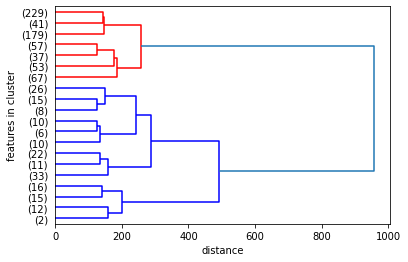

In [21]:
np.random.seed(333)
# fig = plt.figure(figsize=(20,20))
hierarchy.set_link_color_palette(['b', 'r', 'g'])
Z = hierarchy.linkage(XT , method=d_group, metric=d_sample) #method denotes cluster distance, metric denotes sample distance
plt.figure()
# plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('features in cluster')
plt.xlabel('distance')
den = hierarchy.dendrogram(
    Z,
#     leaf_rotation=90.,
    leaf_font_size=10.,
    truncate_mode='lastp',
    p = N_leafs,
    count_sort = "ascending",
    orientation='right'
)
plt.savefig("plots/LOSO_CLR_featadd_4.jpg",dpi=300)
plt.show()

In [22]:
np.random.seed(333)
k = 20
cluster_designation = fcluster(Z, k, criterion = "maxclust")
# with open('cluster_designation_ICA_100.pkl', 'wb') as f:
#     pickle.dump(cluster_designation, f)
for i in range(1,k+1):
    datapoints = np.where(cluster_designation == i)
    print("The associated labels with cluster {} is:".format(i))
    print(datapoints[0])
    print("\n")

The associated labels with cluster 1 is:
[  2   3   4  10  12  15  19  21  22  33  36  37  39  40  41  48  51  52
  58  63  70  87  89  95  97 104 117 119 124 125 135 136 145 146 147 148
 149 151 154 155 157 161 168 174 188 190 203 211 214 216 222 224 233 234
 241 244 250 274 279 281 282 292 303 306 311 318 332 336 338 339 340 342
 345 353 354 359 361 370 373 374 380 387 389 391 392 394 404 406 410 412
 424 428 440 446 447 457 463 468 471 476 478 481 483 484 491 495 497 500
 503 510 511 514 517 518 520 523 534 536 544 546 549 550 554 555 560 563
 566 569 575 578 582 587 592 599 603 606 619 624 625 628 629 640 641 654
 666 668 674 676 684 690 710 719 730 744 748 751 752 753 754 768 771 772
 787 790 792 794 795 805 814 818 822 830 831 832 833 837 838 839 845]


The associated labels with cluster 2 is:
[  6  32  73  75  88 112 113 120 121 123 131 143 153 156 173 185 194 221
 256 260 288 320 398 417 426 436 459 465 537 548 551 609 648 678 717 758
 780 781 804 817 825]


The associated labe

In [23]:
X_new = pd.DataFrame()

# Summation of features in the same cluster

In [24]:
k = 20
cluster_designation = fcluster(Z, k, criterion = "maxclust")
for i in range(1,k+1):
#     print("cluster number=",i)
    datapoints = np.where(cluster_designation == i)
#     print(X.iloc[:,datapoints[0]])
    X_new[f"{i}"] = (X.iloc[:,datapoints[0]]).sum(axis=1)
    

In [25]:
X_new

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,-105.642589,3.523409,-92.246457,-10.842514,-14.564065,-9.463218,-13.855369,76.950658,49.846658,7.948933,11.997859,-17.600960,15.747128,-5.359820,7.656326,14.626570,17.383610,53.427690,8.527089,1.939061
1,-132.559431,0.686573,-117.879118,-33.839001,0.368988,-5.450244,13.086981,72.105231,29.220280,6.478679,16.046478,0.346984,20.771332,-1.210382,6.475880,24.276589,31.065191,43.517274,31.887459,-5.395743
2,-125.820963,-29.318014,-122.626954,40.305080,-26.607432,9.570022,19.152528,74.205878,36.133930,4.056305,2.475786,37.753835,-4.098960,1.987441,-8.440176,27.583215,11.461091,42.995740,16.015795,-6.784145
3,-109.827708,-2.130972,-73.175728,-33.102889,-4.895685,6.343304,-14.379102,66.353085,42.533320,1.782594,14.423091,-14.711778,10.534064,-4.101555,10.320962,4.699534,22.557302,71.811843,6.837782,-1.871465
4,-157.076006,-2.560414,-154.402908,-34.053480,32.223315,5.883290,-26.036329,41.949521,53.124888,10.032831,37.293703,51.091919,19.164965,-1.440777,8.477097,13.370941,24.086364,35.228973,41.661200,1.980905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,-135.482146,4.662305,-152.819028,-50.540514,25.331998,-2.516600,-31.505189,52.733280,62.210393,14.143995,37.520076,27.989724,16.184726,-10.239194,6.294204,0.992845,28.950867,61.940471,30.870036,13.277754
764,-119.300415,-4.276729,-140.446478,-43.307099,42.011823,-15.461389,-7.324946,44.725894,57.869686,8.734915,38.412462,26.337352,-10.345786,-4.509702,4.708844,2.614399,30.080757,32.968018,52.712497,3.795897
765,-172.142869,-18.304606,-136.150350,-27.622497,37.332445,-7.721931,-39.142331,41.211884,64.103819,11.788660,37.141524,21.923082,36.069846,-1.041638,2.717797,-4.894031,25.678374,50.417046,60.466569,18.169207
766,-88.603652,19.872399,-91.702457,2.176852,24.157245,-3.398766,-23.370564,18.979715,20.380324,0.412639,14.867101,14.679876,-2.292881,4.328534,29.531122,-2.852520,11.329032,30.099205,11.842104,9.564691


# Feature selection

In [26]:
X_colnames = X_new.columns.values.tolist()

In [27]:
np.random.seed(333)
importances = mutual_info_classif(X_new,y)
f_i = list(zip(X_colnames,importances))

f_i.sort(key = lambda x : x[1])

In [28]:
f_i

[('6', 0.0),
 ('8', 0.0),
 ('10', 0.0),
 ('14', 0.0),
 ('17', 0.0),
 ('18', 0.0),
 ('19', 0.0),
 ('15', 0.0032482742345829596),
 ('16', 0.01116219314105682),
 ('4', 0.01650498971353631),
 ('3', 0.017918094837578558),
 ('12', 0.02026531372528706),
 ('1', 0.02552714174102122),
 ('11', 0.0280507471677085),
 ('7', 0.028238099651494375),
 ('2', 0.0287300873375127),
 ('5', 0.03359536844224209),
 ('20', 0.04322037757881869),
 ('9', 0.048967133438106325),
 ('13', 0.050182129795516284)]

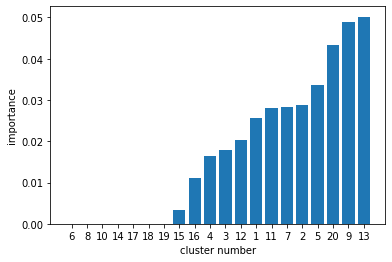

In [29]:
# fig = plt.figure(figsize=(10,10))
plt.bar([x[0] for x in f_i[-20:]], [x[1] for x in f_i[-20:]], color = "tab:blue")
plt.xlabel("cluster number") 
plt.ylabel("importance") 
plt.savefig("plots/LOSO_CLR_featadd_3.jpg",dpi=300)
plt.show()

In [30]:
# [x[1] for x in f_i[-40:]]

In [31]:
X_reduced = pd.DataFrame()

In [32]:
for x in f_i:
    if x[1]>0:
        X_reduced[x[0]] = X_new.loc[:,x[0]]

In [33]:
X_reduced

,15,16,4,3,12,1,11,7,2,5,20,9,13
0,7.656326,14.626570,-10.842514,-92.246457,-17.600960,-105.642589,11.997859,-13.855369,3.523409,-14.564065,1.939061,49.846658,15.747128
1,6.475880,24.276589,-33.839001,-117.879118,0.346984,-132.559431,16.046478,13.086981,0.686573,0.368988,-5.395743,29.220280,20.771332
2,-8.440176,27.583215,40.305080,-122.626954,37.753835,-125.820963,2.475786,19.152528,-29.318014,-26.607432,-6.784145,36.133930,-4.098960
3,10.320962,4.699534,-33.102889,-73.175728,-14.711778,-109.827708,14.423091,-14.379102,-2.130972,-4.895685,-1.871465,42.533320,10.534064
4,8.477097,13.370941,-34.053480,-154.402908,51.091919,-157.076006,37.293703,-26.036329,-2.560414,32.223315,1.980905,53.124888,19.164965
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,6.294204,0.992845,-50.540514,-152.819028,27.989724,-135.482146,37.520076,-31.505189,4.662305,25.331998,13.277754,62.210393,16.184726
764,4.708844,2.614399,-43.307099,-140.446478,26.337352,-119.300415,38.412462,-7.324946,-4.276729,42.011823,3.795897,57.869686,-10.345786
765,2.717797,-4.894031,-27.622497,-136.150350,21.923082,-172.142869,37.141524,-39.142331,-18.304606,37.332445,18.169207,64.103819,36.069846
766,29.531122,-2.852520,2.176852,-91.702457,14.679876,-88.603652,14.867101,-23.370564,19.872399,24.157245,9.564691,20.380324,-2.292881


In [34]:
# selector = SelectPercentile(mutual_info_classif, percentile=10)
# X_reduced = selector.fit_transform(X, y)

In [35]:
# X_reduced = selector.fit_transform(X, y)
# X_reduced = pd.DataFrame(X_reduced)
# X_reduced.shape

In [36]:
# selector.get_feature_names_out()

# Random Forest Classification

In [37]:
# some hyper parameters
SEED = 123
test_train_split_SEED = 123
# FOLDS = 10
show_fold_stats = True
VERBOSE = 0
FOLDS = 5

https://github.com/garudlab/Microbiome_PCA_Correction/blob/main/RF_Classifier/classifier.py

In [38]:
unique_groups = list(np.unique(groups))
unique_groups

['AT-CRC_species',
 'CN-CRC_species',
 'DE-CRC_species',
 'FR-CRC_species',
 'IT-CRC-2_species',
 'IT-CRC_species',
 'JP-CRC_species',
 'US-CRC_species']

In [39]:
df.Country[df.Country == 'AT-CRC_species'].index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
             99, 100, 101, 102, 103, 104, 105, 106, 107, 108],
           dtype='int64', length=109)

In [40]:
AUC_scores = pd.DataFrame(index=unique_groups, columns=unique_groups)
AUC_scores

,AT-CRC_species,CN-CRC_species,DE-CRC_species,FR-CRC_species,IT-CRC-2_species,IT-CRC_species,JP-CRC_species,US-CRC_species
AT-CRC_species,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CN-CRC_species,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DE-CRC_species,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FR-CRC_species,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IT-CRC-2_species,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IT-CRC_species,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JP-CRC_species,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
US-CRC_species,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
ROC_curve = pd.DataFrame(index=unique_groups, columns=["fpr","tpr","auc"])
ROC_curve

,fpr,tpr,auc
AT-CRC_species,NaN,NaN,NaN
CN-CRC_species,NaN,NaN,NaN
DE-CRC_species,NaN,NaN,NaN
FR-CRC_species,NaN,NaN,NaN
IT-CRC-2_species,NaN,NaN,NaN
IT-CRC_species,NaN,NaN,NaN
JP-CRC_species,NaN,NaN,NaN
US-CRC_species,NaN,NaN,NaN


In [42]:
#indexing is fine, names are not??
grp = 0
for i in range(len(unique_groups)):
    outer_test_index = list(np.where(df["Country"]==unique_groups[i])[0])
#     print("OUTER TEST",unique_groups[i])
#     print("OUTER TEST",outer_test_index)
    
    inner_group_list = []
    inner_group_list.append(unique_groups[:i] + unique_groups[i+1:])
#     print(inner_group_list)
    
    outer_train_index = list(np.where(df["Country"]!=unique_groups[i])[0])
#     print("OUTER TRAIN",inner_group_list)
#     print("OUTER TRAIN",outer_train_index)
#     print("******************")
    
    #Training dataset
    outer_train_X = X_reduced.iloc[outer_train_index]
    outer_train_y = y[outer_train_index]
    
    #Test dataset
    outer_test_X =  X_reduced.iloc[outer_test_index]
    outer_test_y =  y[outer_test_index]
    
    for k,name in enumerate(inner_group_list[0]):
        inner_val_index = list(np.where(df["Country"]==name)[0])
#         print("INNER VALIDATION",inner_val_index)
#         print("INNER VALIDATION",name)
        
        inner_train_names = []
        inner_train_names.append(inner_group_list[:k] + inner_group_list[k+1:])
#         print(inner_train_names)
        
        inner_train_index = list(np.where((df["Country"]!=name) & (df["Country"]!=unique_groups[i]))[0])
#         print("INNER TRAIN",inner_train_index)
#         print("INNER TRAIN",inner_train_names)
#         print("########################")
    
        #Inner training dataset
        inner_train_X = X_reduced.iloc[inner_train_index]
        inner_train_y = y[inner_train_index]
        
        #Inner validation dataset
        inner_val_X =  X_reduced.iloc[inner_val_index]
        inner_val_y =  y[inner_val_index]
        
        
        
        # Random Forest
        clf = RandomForestClassifier(n_estimators = 500, random_state = SEED, verbose = 0, bootstrap=True)
#         clf = SVC(probability = True)
        clf.fit(inner_train_X, inner_train_y)

        RF_pred_class = clf.predict(inner_val_X)
        RF_preds = clf.predict_proba(inner_val_X)

        RF_AUC_test_score = roc_auc_score(inner_val_y, RF_preds[:,1])
        RF_f1_test = f1_score(inner_val_y, RF_pred_class)
        RF_recall_test = recall_score(inner_val_y, RF_pred_class)
        RF_precision_test = precision_score(inner_val_y, RF_pred_class)
        
        #Specificity and sensitivity
        tn, fp, fn, tp = confusion_matrix(inner_val_y, RF_pred_class).ravel()
        specificity = tn / (tn + fp)
        sensitivity = tp / (tp + fn)
        
        #Adding auc to dataframe
        AUC_scores.at[unique_groups[i], name] = RF_AUC_test_score

        if show_fold_stats:
            print('-' * 80)
            print('Fold : %s'%(k+1),name)
            print('ROC AUC score for RandomForest model, validation set: %.4f'%RF_AUC_test_score)
            print('F1 : %.4f, Recall : %.4f , Precision : %.4f'%(RF_f1_test, RF_recall_test, RF_precision_test))
            print(confusion_matrix(inner_val_y, RF_pred_class))
                
    # Random Forest on logo_test data
    clf = RandomForestClassifier(n_estimators = 500, random_state = SEED, verbose = 0, bootstrap=True)
#     clf = SVC(probability = True)
    clf.fit(outer_train_X, outer_train_y)
        
    RF_pred_class = clf.predict(outer_test_X)
    RF_preds = clf.predict_proba(outer_test_X)

    RF_AUC_test_score = roc_auc_score(outer_test_y, RF_preds[:,1])
    RF_f1_test = f1_score(outer_test_y, RF_pred_class)
    RF_recall_test = recall_score(outer_test_y, RF_pred_class)
    RF_precision_test = precision_score(outer_test_y, RF_pred_class)
    
    #Specificity and sensitivity
    tn, fp, fn, tp = confusion_matrix(outer_test_y, RF_pred_class).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    
    #Adding auc to dataframe
    AUC_scores.at[unique_groups[i], unique_groups[i]] = RF_AUC_test_score
    
    #Getting AUCROC data
    fpr, tpr, _ = roc_curve(outer_test_y,  RF_preds[:,1])

    #Adding roc curve values to dataframe
    ROC_curve.at[unique_groups[i], "fpr"] = ",".join(str(x) for x in fpr)
    ROC_curve.at[unique_groups[i], "tpr"] = ",".join(str(x) for x in tpr)
    ROC_curve.at[unique_groups[i], "auc"] = RF_AUC_test_score
    

    if show_fold_stats:
        print('-' * 80)
        print('-' * 80)
        print('Group : %s'%(grp+1),unique_groups[i])
        print('ROC AUC score for RandomForest model, LOGO test set: %.4f'%RF_AUC_test_score)
        print('F1 : %.4f, Recall : %.4f , Precision : %.4f'%(RF_f1_test, RF_recall_test, RF_precision_test))
        print(confusion_matrix(outer_test_y, RF_pred_class))
        print('-' * 80)
        print('-' * 80)
    grp += 1
        

--------------------------------------------------------------------------------
Fold : 1 CN-CRC_species
ROC AUC score for RandomForest model, validation set: 0.7843
F1 : 0.6733, Recall : 0.6296 , Precision : 0.7234
[[61 13]
 [20 34]]
--------------------------------------------------------------------------------
Fold : 2 DE-CRC_species
ROC AUC score for RandomForest model, validation set: 0.6940
F1 : 0.7338, Recall : 0.8500 , Precision : 0.6456
[[32 28]
 [ 9 51]]
--------------------------------------------------------------------------------
Fold : 3 FR-CRC_species
ROC AUC score for RandomForest model, validation set: 0.7932
F1 : 0.6847, Recall : 0.6230 , Precision : 0.7600
[[41 12]
 [23 38]]
--------------------------------------------------------------------------------
Fold : 4 IT-CRC-2_species
ROC AUC score for RandomForest model, validation set: 0.6825
F1 : 0.6765, Recall : 0.8214 , Precision : 0.5750
[[15 17]
 [ 5 23]]
----------------------------------------------------------

--------------------------------------------------------------------------------
Fold : 1 AT-CRC_species
ROC AUC score for RandomForest model, validation set: 0.7771
F1 : 0.7761, Recall : 0.8254 , Precision : 0.7324
[[27 19]
 [11 52]]
--------------------------------------------------------------------------------
Fold : 2 CN-CRC_species
ROC AUC score for RandomForest model, validation set: 0.7829
F1 : 0.6346, Recall : 0.6111 , Precision : 0.6600
[[57 17]
 [21 33]]
--------------------------------------------------------------------------------
Fold : 3 DE-CRC_species
ROC AUC score for RandomForest model, validation set: 0.7154
F1 : 0.7194, Recall : 0.8333 , Precision : 0.6329
[[31 29]
 [10 50]]
--------------------------------------------------------------------------------
Fold : 4 FR-CRC_species
ROC AUC score for RandomForest model, validation set: 0.8037
F1 : 0.7731, Recall : 0.7541 , Precision : 0.7931
[[41 12]
 [15 46]]
------------------------------------------------------------

In [43]:
AUC_scores

,AT-CRC_species,CN-CRC_species,DE-CRC_species,FR-CRC_species,IT-CRC-2_species,IT-CRC_species,JP-CRC_species,US-CRC_species
AT-CRC_species,0.787612,0.784284,0.694028,0.793226,0.682478,0.685345,0.641875,0.658469
CN-CRC_species,0.777778,0.776026,0.675694,0.801732,0.671317,0.630747,0.68625,0.655325
DE-CRC_species,0.817115,0.78954,0.699167,0.774358,0.708147,0.692529,0.687813,0.684172
FR-CRC_species,0.763975,0.767142,0.66375,0.797402,0.666295,0.638649,0.687188,0.630362
IT-CRC-2_species,0.777088,0.782908,0.715417,0.803743,0.669643,0.68319,0.665,0.651442
IT-CRC_species,0.794168,0.788413,0.71625,0.793535,0.651228,0.676006,0.665,0.663277
JP-CRC_species,0.746204,0.777903,0.71375,0.78905,0.679688,0.661638,0.67375,0.668824
US-CRC_species,0.804175,0.764264,0.695833,0.792917,0.673549,0.648707,0.694063,0.652552


In [44]:
import seaborn as sns

In [45]:
AUC_scores = AUC_scores.apply(pd.to_numeric, errors='coerce')

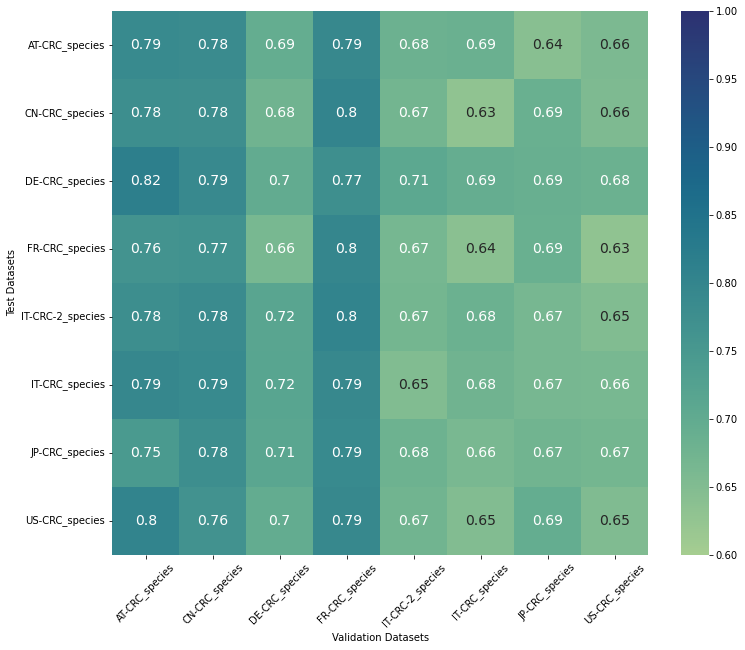

In [46]:
plt.figure(figsize=(12,10))
sns.set_palette("husl", 8)
ax = sns.heatmap(AUC_scores, annot = True, cmap="crest", vmin=0.6, vmax=1.0, annot_kws={"fontsize":14})
ax.set(xlabel="Validation Datasets", ylabel="Test Datasets")
ax.tick_params(axis='x', rotation=45)
# ax.xaxis.tick_top()
# ax.set(title = "AUC scores of Test and Validations Datasets")
plt.savefig("plots/LOSO_CLR_featadd_1.jpg",dpi=300)

# ROC curves

In [47]:
ROC_curve

,fpr,tpr,auc
AT-CRC_species,"0.0,0.0,0.0,0.0,0.0,0.021739130434782608,0.021...","0.0,0.015873015873015872,0.031746031746031744,...",0.787612
CN-CRC_species,"0.0,0.0,0.0,0.02702702702702703,0.027027027027...","0.0,0.018518518518518517,0.24074074074074073,0...",0.776026
DE-CRC_species,"0.0,0.016666666666666666,0.03333333333333333,0...","0.0,0.0,0.0,0.016666666666666666,0.01666666666...",0.699167
FR-CRC_species,"0.0,0.018867924528301886,0.018867924528301886,...","0.0,0.01639344262295082,0.11475409836065574,0....",0.797402
IT-CRC-2_species,"0.0,0.0,0.0625,0.125,0.125,0.15625,0.15625,0.1...","0.0,0.03571428571428571,0.03571428571428571,0....",0.669643
IT-CRC_species,"0.0,0.034482758620689655,0.034482758620689655,...","0.0,0.0,0.041666666666666664,0.041666666666666...",0.676006
JP-CRC_species,"0.0,0.025,0.025,0.05,0.1,0.1,0.125,0.125,0.125...","0.0,0.0,0.025,0.025,0.025,0.05,0.05,0.225,0.27...",0.67375
US-CRC_species,"0.0,0.0,0.0,0.019230769230769232,0.01923076923...","0.0,0.019230769230769232,0.038461538461538464,...",0.652552


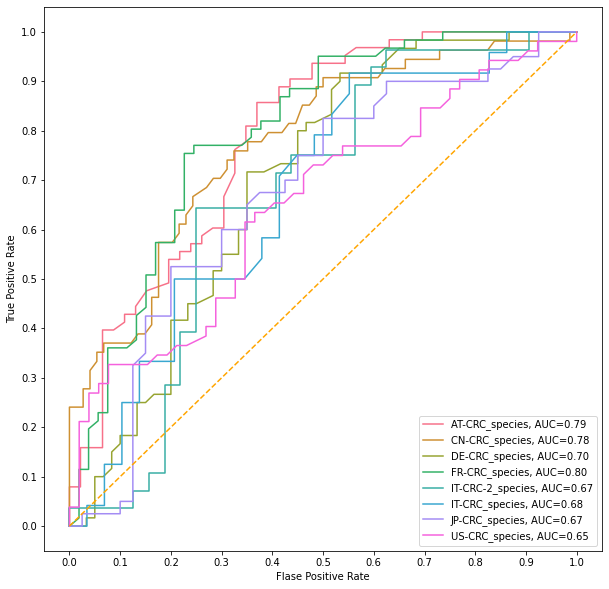

In [48]:
fig = plt.figure(figsize=(10,10))

for i in ROC_curve.index:
#     if aucroc.loc[i]['auc'] > 0.820:
    plt.plot([float(s) for s in ROC_curve.loc[i]['fpr'].split(",")], 
             [float(s) for s in ROC_curve.loc[i]['tpr'].split(",")], 
             label="{}, AUC={:.2f}".format(i, ROC_curve.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate")#, fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate")#, fontsize=15)

# plt.title('ROC Curve Analysis of Test Datasets', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')

plt.savefig("plots/LOSO_CLR_featadd_2.jpg",dpi=300)
plt.show()